# Student Performance Predictor using Machine Learning

This project demonstrates how to build a simple regression model to predict a student's **final marks** based on features such as:

- Attendance percentage
- Daily study hours
- Previous academic performance

The goal is to help students understand how these factors influence academic outcomes, and give teachers insight into areas where students might need support.

## Step 1: Importing Required Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%pip install faker
import random
from faker import Faker

sns.set(style="whitegrid")

## Step 2: Generating Synthetic Dataset

In [41]:
fake = Faker()
random.seed(42)
np.random.seed(42)
# Seed is given to always generate same data

num_students = 200

data = {
    "Name": [fake.name() for _ in range(num_students)],
    "Attendance (%)": np.random.randint(60, 101, num_students),
    "Study Hours": np.random.randint(1, 7, num_students),
    "Previous Marks": np.random.randint(40, 91, num_students),
}

df = pd.DataFrame(data)

# Generating final marks using a noisy linear function
df["Final Marks"] = (
    0.3 * df["Attendance (%)"]
    + 5 * df["Study Hours"]
    + 0.4 * df["Previous Marks"]
    + np.random.normal(0, 5, num_students)
).round(2)

# Clamp final marks between 0 and 100
df["Final Marks"] = df["Final Marks"].clip(0, 100)

df.head()

,Name,Attendance (%),Study Hours,Previous Marks,Final Marks
0,Penny Roberts,98,3,71,74.86
1,Robert Lopez,88,1,69,56.18
2,Martin Dominguez,74,1,86,57.49
3,Lisa Cunningham,67,4,74,70.92
4,Jenny Smith,80,3,79,71.82


## Initial Data Insights

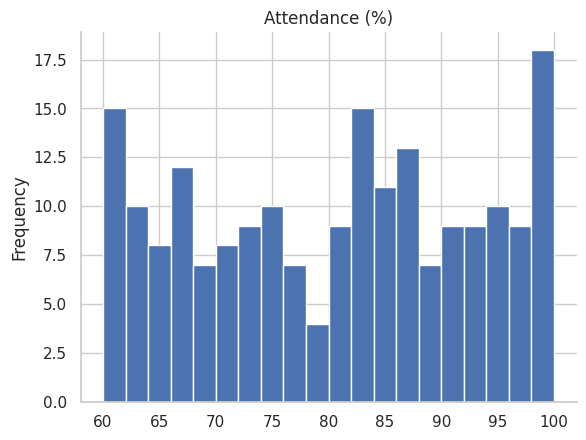

In [42]:
# @title Attendance (%)

from matplotlib import pyplot as plt

df["Attendance (%)"].plot(kind="hist", bins=20, title="Attendance (%)")
plt.gca().spines[["top", "right",]].set_visible(False)

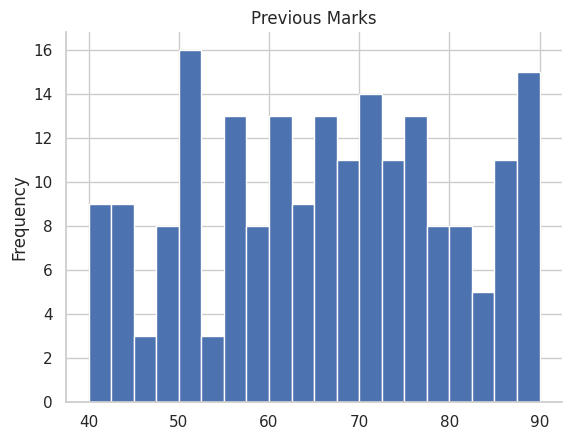

In [43]:
# @title Previous Marks

from matplotlib import pyplot as plt

df["Previous Marks"].plot(kind="hist", bins=20, title="Previous Marks")
plt.gca().spines[["top", "right",]].set_visible(False)

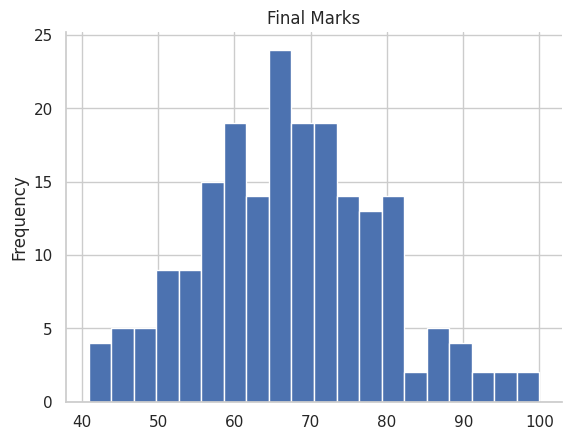

In [44]:
# @title Final Marks

from matplotlib import pyplot as plt

df["Final Marks"].plot(kind="hist", bins=20, title="Final Marks")
plt.gca().spines[["top", "right",]].set_visible(False)

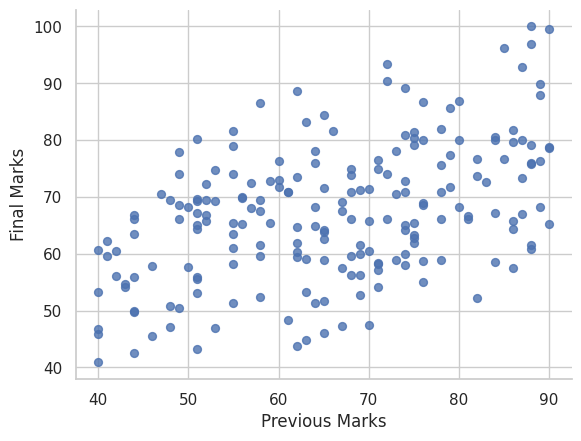

In [45]:
# @title Previous Marks vs Final Marks

from matplotlib import pyplot as plt

df.plot(kind="scatter", x="Previous Marks", y="Final Marks", s=32, alpha=0.8)
plt.gca().spines[["top", "right",]].set_visible(False)

## Step 3: Preprocessing of Data

In [46]:
# Droping the 'Name' column as it is not useful for prediction
df_cleaned = df.drop(columns=["Name"])

# Check for missing values
df_cleaned.isnull().sum()

,0
Attendance (%),0
Study Hours,0
Previous Marks,0
Final Marks,0


## Step 4: Spliting the Dataset (80/20)

In [47]:
X = df_cleaned.drop(columns=["Final Marks"])
y = df_cleaned["Final Marks"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 160
Testing samples: 40


## Step 5: Training a Linear Regression Model

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [0.27901054 5.30112051 0.38128628]
Intercept: 1.478334559197549


## Step 6: Evaluating the Model

In [49]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 3.83
Mean Squared Error (MSE): 25.78
R² Score: 0.74


## Result: Plot Predicted vs Actual Marks

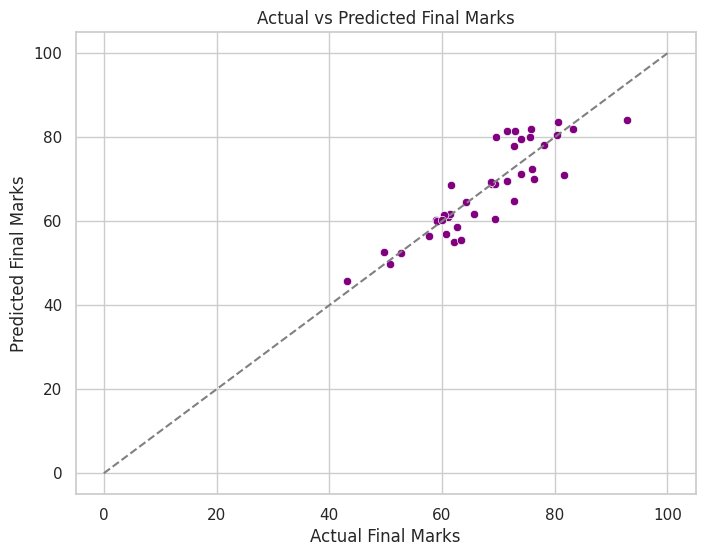

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple")
plt.plot([0, 100], [0, 100], "--", color="gray")
plt.xlabel("Actual Final Marks")
plt.ylabel("Predicted Final Marks")
plt.title("Actual vs Predicted Final Marks")
plt.grid(True)
plt.show()

## Try Your Own Prediction (Manual Input)

In [51]:
# Input your own values
custom_attendance = 85
custom_study_hours = 4
custom_prev_marks = 75

# Create a DataFrame for the custom input
custom_input = pd.DataFrame([[custom_attendance, custom_study_hours, custom_prev_marks]],
                           columns=['Attendance (%)', 'Study Hours', 'Previous Marks'])

predicted_final = model.predict(custom_input)[0]

print(f"Predicted Final Marks: {predicted_final:.2f}")

Predicted Final Marks: 75.00
